In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import ruptures as rpt
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression

# Dane

A family of datasets synthetically generated from a simulation of how bank-customers choose their banks. Tasks are based on predicting the fraction of bank customers who leave the bank because of full queues. The bank family of datasets are generated from a simplistic simulator, which simulates the queues in a series of banks. The simulator was constructed with the explicit purpose of generating a family of datasets for DELVE. Customers come from several residential areas, choose their preferred bank depending on distances and have tasks of varying complexity, and various levels of patience. Each bank has several queues, that open and close according to demand. The tellers have various effectivities, and customers may change queue, if their patience expires. In the rej prototasks, the object is to predict the rate of rejections, ie the fraction of customers that are turned away from the bank because all the open tellers have full queues. Source: collection of regression datasets by Luis Torgo (ltorgo@ncc.up.pt) at http://www.ncc.up.pt/~ltorgo/Regression/DataSets.html Orginal source: DELVE repository of data. Characteristics: Data set contains 8192 (4500+3692) cases. and 9 continuous attributes
https://www.openml.org/d/572

In [3]:
data = pd.read_csv('phpSRIcMD.csv')

In [4]:
data.head()

,a1cx,a1cy,b2x,b2y,a2pop,a3pop,temp,mxql,rej
0,-0.102111,-0.193977,-0.385334,0.257042,7.188886,15.128160,0.671618,8.0,0.657019
1,0.373578,-0.425602,0.289500,0.234217,2.028584,2.856180,0.569577,5.0,0.143680
2,0.385361,0.108340,-0.048971,-0.147634,4.073232,3.616225,0.126882,6.0,0.264202
3,0.316211,-0.134321,0.080048,0.036333,0.360257,1.069743,0.807717,8.0,0.003634
4,0.007116,0.295712,0.007483,-0.456627,0.072030,0.968635,0.188453,7.0,0.004023


In [43]:
y = data[['rej']]
X = data.drop(['rej'],axis=1,inplace=False)

In [9]:
X.head()

,a1cx,a1cy,b2x,b2y,a2pop,a3pop,temp,mxql
0,-0.102111,-0.193977,-0.385334,0.257042,7.188886,15.128160,0.671618,8.0
1,0.373578,-0.425602,0.289500,0.234217,2.028584,2.856180,0.569577,5.0
2,0.385361,0.108340,-0.048971,-0.147634,4.073232,3.616225,0.126882,6.0
3,0.316211,-0.134321,0.080048,0.036333,0.360257,1.069743,0.807717,8.0
4,0.007116,0.295712,0.007483,-0.456627,0.072030,0.968635,0.188453,7.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y , test_size = 0.2, random_state=0)

# Model 1 - SVM
# Model 2 - Random Forest

In [12]:
model_1 = SVR()
model_1.fit(X_train, np.array(y_train).ravel())

model_2 = RandomForestRegressor(n_estimators=100)
model_2.fit(X_train, np.array(y_train).ravel())
print('MSE SVM: '+'%4.8f' % (mean_squared_error(y_test, model_1.predict(X_test))))
print('MSE Random Forest: '+'%4.8f' % (mean_squared_error(y_test, model_2.predict(X_test))))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MSE SVM: 0.00246921
MSE Random Forest: 0.00092269


Random forest jest lepszy dlatego został wybrany dla transformacji zmiennych

In [24]:
def pd_plot(model, features, feature_name, penalty):
    feature_index = data.columns.get_loc(feature_name)
    colnames = list(features.columns)
    features_values = features.values
    
    min_value = min(features_values[:,feature_index])
    max_value = max(features_values[:,feature_index])
    all_proba = []
    x = np.linspace(min_value,max_value,len(np.unique(features_values[:,feature_index])))
    for j in range(features_values.shape[0]):
        x_to_predict = np.tile(features_values[j],(len(np.unique(features_values[:,feature_index])), 1))
        x_to_predict[:,feature_index] = x
        y = model.predict(x_to_predict)
        all_proba.append(y)
    plt.plot(x, np.mean(all_proba, axis = 0), color = 'black',linewidth = 5 , zorder = 15)
    
    algo = rpt.Pelt(model="l1").fit(np.mean(all_proba, axis = 0))
    result = algo.predict(pen=penalty)
    breakpoints = []
    for i in range(len(result)-1):
        plt.axvline(x[result[i]-1], color = 'red', linestyle = ':', markersize = 10, zorder = 10)
        breakpoints.append(x[result[i]-1])
    plt.title('PD plot for ' + feature_name)
    plt.show()
    
    return breakpoints

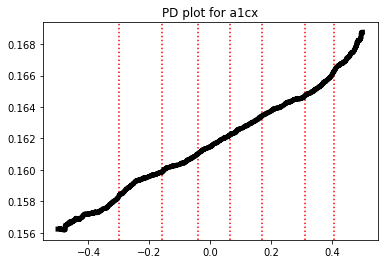

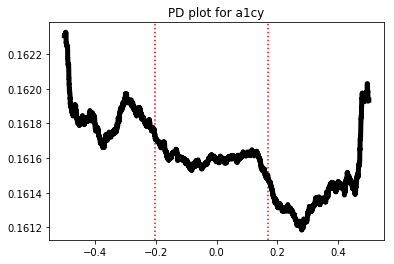

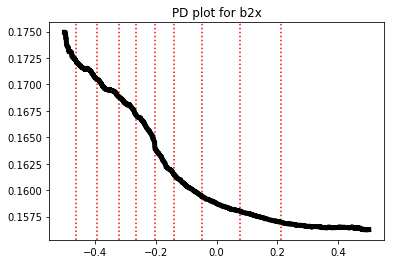

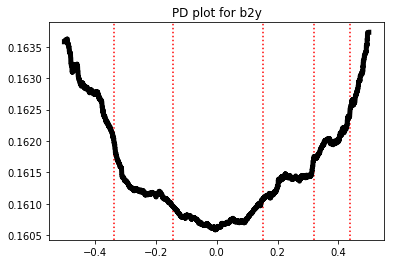

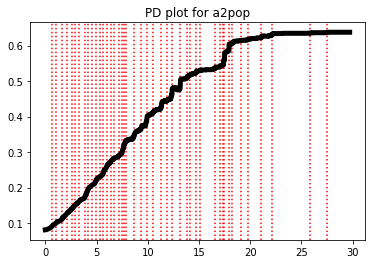

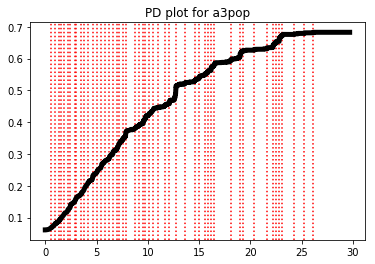

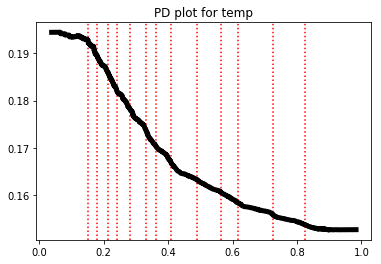

In [25]:
breakpoints_0 = pd_plot(model_2, X, 'a1cx', 0.3)
breakpoints_1 = pd_plot(model_2, X, 'a1cy', 0.3)
breakpoints_2 = pd_plot(model_2, X, 'b2x', 0.3)
breakpoints_3 = pd_plot(model_2, X, 'b2y', 0.3)
breakpoints_4 = pd_plot(model_2, X, 'a2pop', 0.3)
breakpoints_5 = pd_plot(model_2, X, 'a3pop', 0.3)
breakpoints_6 = pd_plot(model_2, X, 'temp', 0.3)

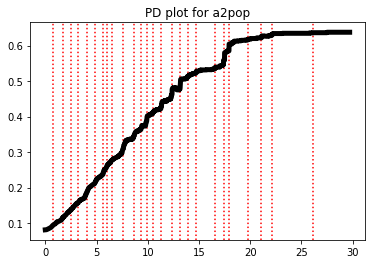

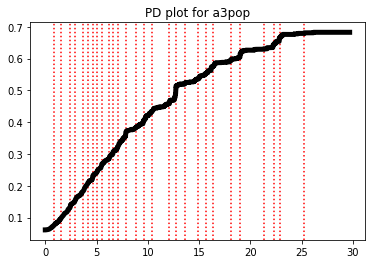

In [36]:
breakpoints_4 = pd_plot(model_2, X, 'a2pop', 1)
breakpoints_5 = pd_plot(model_2, X, 'a3pop', 1)

## Transformacja zmiennej kategorycznej

In [27]:
X['mxql'].unique()

array([8., 5., 6., 7.])

In [32]:
def transform_cat_variable(model, var, X, n_clusters):
    df = pd.concat([X] * X[var].nunique())
    df[var] = np.repeat(X[var].unique(), X.shape[0])
    df = df.assign(predictions = model.predict(df))
    df = df.groupby(var).agg({'predictions':'mean'})
    cl = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = cl.fit_predict(df)
    return dict(zip(df.index, map(str, clusters)))

In [33]:
transformed_mxql = transform_cat_variable(model_2, 'mxql', X, 2)

In [34]:
transformed_mxql

{5.0: '0', 6.0: '0', 7.0: '1', 8.0: '1'}

In [38]:
def transform_column(features, feature_name, breakpoints):
    feature_index = data.columns.get_loc(feature_name)
    colnames = features.columns
    
    condition = features[colnames[feature_index]] < breakpoints[0]
    features.loc[condition, colnames[feature_index]] = 0
    
    if len(breakpoints) > 2:
        for i in range(len(breakpoints)-1):
            condition = (features[colnames[feature_index]] >= breakpoints[i]) & (features[colnames[feature_index]] < breakpoints[i+1])
            features.loc[condition, colnames[feature_index]] = i + 1
    condition = features[colnames[feature_index]] >= breakpoints[-1]
    features.loc[condition, colnames[feature_index]] = len(breakpoints)

    return features

In [44]:
X_original = X.copy()
X = transform_column(X, 'a1cx', breakpoints_0)
X = transform_column(X, 'a1cy', breakpoints_1)
X = transform_column(X, 'b2x', breakpoints_2)
X = transform_column(X, 'b2y', breakpoints_3)
X = transform_column(X, 'a2pop', breakpoints_4)
X = transform_column(X, 'a3pop', breakpoints_5)
X = transform_column(X, 'temp', breakpoints_6)
X['mxql'] = X['mxql'].replace(transformed_mxql)

In [45]:
X_original.head()

,a1cx,a1cy,b2x,b2y,a2pop,a3pop,temp,mxql
0,-0.102111,-0.193977,-0.385334,0.257042,7.188886,15.128160,0.671618,8.0
1,0.373578,-0.425602,0.289500,0.234217,2.028584,2.856180,0.569577,5.0
2,0.385361,0.108340,-0.048971,-0.147634,4.073232,3.616225,0.126882,6.0
3,0.316211,-0.134321,0.080048,0.036333,0.360257,1.069743,0.807717,8.0
4,0.007116,0.295712,0.007483,-0.456627,0.072030,0.968635,0.188453,7.0


In [46]:
X.head()

,a1cx,a1cy,b2x,b2y,a2pop,a3pop,temp,mxql
0,7.0,-0.193977,9.0,5.0,25.0,28.0,13.0,1
1,7.0,0.000000,9.0,5.0,2.0,28.0,13.0,0
2,7.0,0.108340,9.0,5.0,25.0,28.0,0.0,0
3,7.0,-0.134321,9.0,5.0,0.0,1.0,13.0,1
4,7.0,2.000000,9.0,5.0,0.0,1.0,13.0,1


# Testowanie 3 grup modeli

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_original.values, y , test_size = 0.2, random_state=0)
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X.values, y , test_size = 0.2, random_state=0)

## Biała skrzynka regresja liniowa

In [59]:
model_linear = LinearRegression()
model_linear.fit(X_train, np.array(y_train).ravel())
lm_raw = mean_squared_error(y_test,model_linear.predict(X_test))
print('LM raw data: '+'%4.8f' % (mean_squared_error(y_test,model_linear.predict(X_test))))
model_linear.fit(X_t_train, y_t_train)
lm_trans = mean_squared_error(y_t_test,model_linear.predict(X_t_test))
print('LM transformed data: '+'%4.8f' % (mean_squared_error(y_t_test,model_linear.predict(X_t_test))))

LM raw data: 0.00148781
LM transformed data: 0.00955040


## Model SVM

In [60]:
model_1.fit(X_train, np.array(y_train).ravel())
svm_raw = mean_squared_error(y_test,model_1.predict(X_test))
print('SVM raw data: '+'%4.8f' % (mean_squared_error(y_test,model_1.predict(X_test))))
model_1.fit(X_t_train, np.array(y_train).ravel())
svm_trans = mean_squared_error(y_t_test,model_1.predict(X_t_test))
print('SVM transformed data: '+'%4.8f' % (mean_squared_error(y_t_test,model_1.predict(X_t_test))))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM raw data: 0.00246921
SVM transformed data: 0.01138375


## Model Random Forest

In [61]:
model_2.fit(X_train, np.array(y_train).ravel())
rf_raw = mean_squared_error(y_test,model_2.predict(X_test))
print('Random forest raw data: '+'%4.8f' % (mean_squared_error(y_test,model_2.predict(X_test))))
model_2.fit(X_t_train, np.array(y_train).ravel())
rf_trans = mean_squared_error(y_t_test,model_2.predict(X_t_test))
print('Random forest transformed data: '+'%4.8f' % (mean_squared_error(y_t_test,model_2.predict(X_t_test))))

Random forest raw data: 0.00093421
Random forest transformed data: 0.01044772


# Porównanie

| Model | MSE   |
|------|------|
|   Linear regression (original) | 0.00148781|
|   Linear regression (transformed) | 0.00955040|
|   SVM (original) | 0.00246921|
|   SVM (transformed) | 0.01138375|
|   Random forest (original) | 0.00093421|
|   Random forest (transformed) | 0.01044772|

Transformacja kolumn dla żadnego modelu nie poprawiła wyniku. Najlepszym z wybranych jest las losowy na oryginalnych danych.